#CSE/STAT 416 Quiz Section (7/2/20)
##Function properties, gradient descent, and a little bit of stat review

Today we will be reviewing gradient descent, as well as some functional properties that interfere with, aid, or can be utilized for easier maximization. Note that we are going to be talking about these things in the context of one or two dimensional problems, but these properties apply for the higher dimensional data we'll examine throughout this class.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

##Types of functions

Let's start by reviewing some of the types of functions that are of interest in an optimization scenario. There are two (or three) types of functions that we are interested in. Note here that we are focusing on real valued functions (sorry electrical engineers).

###Convex functions

####Definition (Class participation - who can define these?)



#####Convex

A function $f$ is convex over a vector space $X$ if for any $x_1, x_2\in X$ and $t\in(0,1)$,
$$f(tx_1+(1-t)x_2) \leq tf(x_1)+(1-t)f(x_2)$$

#####Strictly Convex


A function $f$ is strictly convex under the same conditions if,
$$f(tx_1+(1-t)x_2) < tf(x_1)+(1-t)f(x_2)$$

####Interpretation

For the more visual learners amongst us, the mathematical definition of convexity can easily be demonstrated in low dimensions. We will consider the strictly convex function $x^2$. Consider two points in $\mathbb{R}$ ($x_1$ and $x_2$), and a straight line connecting $(x_1,f(x_1))$ to $(x_2,f(x_2))$.

The value of any point $tx_1+(1-t)x_2$ along the line is equal to or (in this case for strict convexity) greater than $f(tx_1+(1-t)x_2)$.

In [ ]:
def convexExample(x1, x2):
  x=np.arange(x1-.1,x2+.1,.01)
  fx=x**2
  plt.plot(x,fx)
  plt.plot([x1,x2],[x1**2,x2**2])
  plt.show()

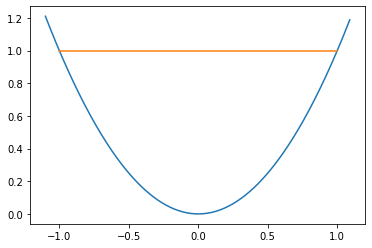

In [ ]:
convexExample(-1,1)

####Examples - Which of the following are convex, strictly convex, or not convex?

#####$x^3$

Not convex

In [ ]:
def convexFunctionChecker(f, x1, x2):
  x=np.arange(x1-.1,x2+.1,.01)
  fx=f(x)
  plt.plot(x,fx)
  plt.plot([x1,x2],[f(x1),f(x2)])
  plt.show()

def xcubed(x):
  return(x**3)

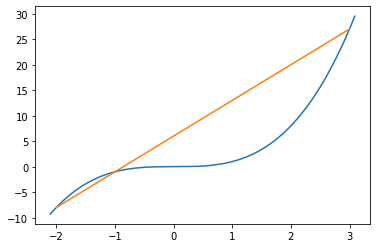

In [ ]:
# We can pass functions to functions!
convexFunctionChecker(xcubed,-2,3)

#####$x^3$, with $x\in[0,\infty)$

Strictly convex! Keep in mind that convexity of a function is conditional on the domain that function is applied over.

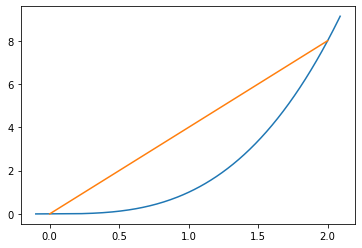

In [ ]:
convexFunctionChecker(xcubed,0,2)

#####$|x|$

Convex

In [ ]:
def abs(x):
  return(np.abs(x))

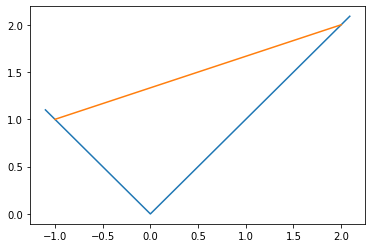

In [ ]:
convexFunctionChecker(abs,-1,2)

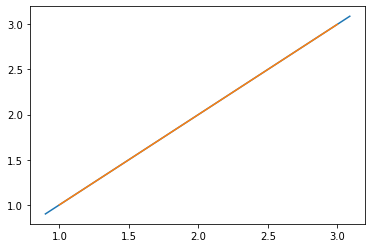

In [ ]:
convexFunctionChecker(abs,1,3) # This demonstrates the lack of strict convexity

#####$e^x$

Strictly convex

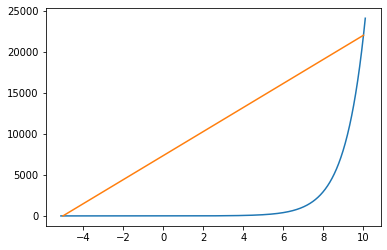

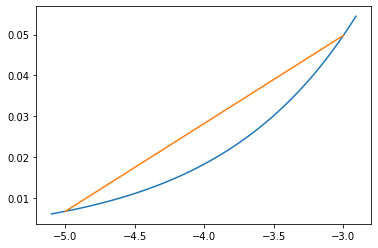

In [ ]:
def exp(x):
  return(np.exp(x))

convexFunctionChecker(exp,-5,10)
convexFunctionChecker(exp,-5,-3)

#####$ax+b$

Convex; note that convexity *includes* the case where $f(tx_1+(1-t)x_2) = tf(x_1)+(1-t)f(x_2)$

###Concave functions

####Definition 

(Class participation - who can define these?)

#####Concave

A function $f$ is concave over a vector space $X$ if for any $x_1, x_2\in X$ and $t\in(0,1)$,
$$f(tx_1+(1-t)x_2) \geq tf(x_1)+(1-t)f(x_2)$$

#####Strictly concave


A function $f$ is strictly concave under the same conditions if,
$$f(tx_1+(1-t)x_2) > tf(x_1)+(1-t)f(x_2)$$

#####Interpretation

The interpretation here is almost identical to convexity - though now the line connecting any two points must lie at or below the function $f$. We will again look at the function $x^2$, which is convex but certainly not concave. But, note that for any convex function $f$, the function $-f$ is concave.

In [ ]:
def concaveExample(x1, x2):
  x=np.arange(x1-.1,x2+.1,.01)
  fx=-x**2
  plt.plot(x,fx)
  plt.plot([x1,x2],[-x1**2,-x2**2])
  plt.show()

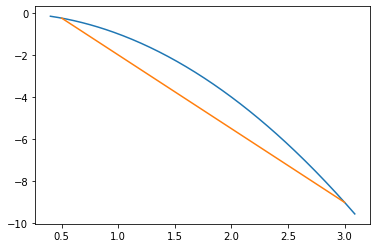

In [ ]:
concaveExample(.5,3)

####Examples

Which of the following are concave, strictly concave, or not concave?

#####$e^{-x}$

Not concave (Don't be tricked by the minus sign! We need $-f$ to turn a convex function into a concave function, $-e^x$ and $-e^{-x}$ are both concave, but $e^{-x}$ is convex.)

In [ ]:
def concaveFunctionChecker(f, x1, x2):
  convexFunctionChecker(f,x1,x2)
  # to be fair, it was really just plotting stuff...

def expneg(x):
  return(np.exp(-x))

def negexp(x):
  return(-np.exp(x))

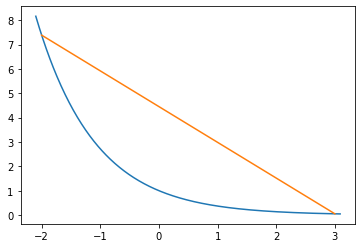

In [ ]:
concaveFunctionChecker(expneg,-2,3) # e^-x

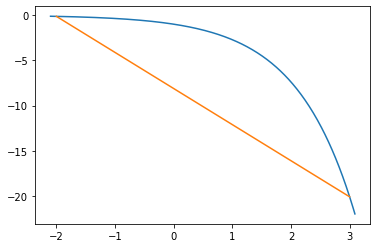

In [ ]:
concaveFunctionChecker(negexp,-2,3) # -e^x

#####$ln(x)$

Strictly concave

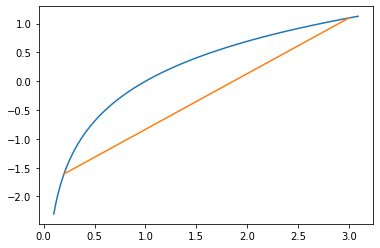

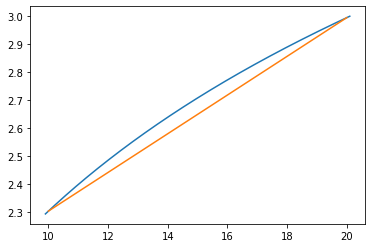

In [ ]:
def ln(x):
  return(np.log(x))

concaveFunctionChecker(ln,0.2,3)
concaveFunctionChecker(ln,10,20)

#####$cos(x)$ with $x\in[-\pi,\pi]$

Not concave - note that portions of this function are convex and concave, but over the domain $[-\pi,\pi]$ this is not the case.

In [ ]:
def cos(x):
  return(np.cos(x))

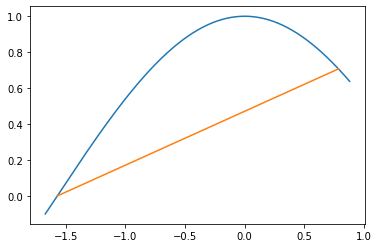

In [ ]:
concaveFunctionChecker(cos,-np.pi/2,np.pi/4) # This segment does not violate concavity.

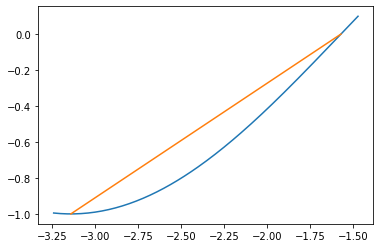

In [ ]:
concaveFunctionChecker(cos,-np.pi,-np.pi/2) # This segment demonstrates why cos(x) is not concave on this domain.

#####$ax+b$

As previously noted, this equation is convex. This is true for $x$ univariate, or for a vector $x$ where we can note that all affine funcions are concave and convex.

###Monotone functions

####Definition 

(Class participation - who can define these?)

#####Monotonic

A function $f$ is monotonically increasing (or monotonically decreasing) if for any $x<y$ in the domain of $f$, $$f(x)\leq f(y).$$ 
(Or $f(x)\geq f(y)$ for monotonically decreasing).



#####Strictly monotonic

Similar to the distinction between convexity and strict convexity, a function $f$ is strictly monotonically increasing if for any $x<y$ in the domain of $f$, $$f(x) < f(y).$$
(Or f(x) > f(y) for strictly monotonically decreasing).



####Examples

Which of the following are monotonic or strictly monotonic? Increasing or decreasing?

#####Sigmoid function $f(x)=\frac{1}{1-e^{-x}}$

Strictly monotonically increasing 

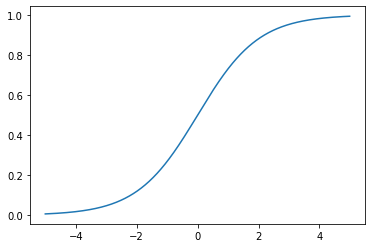

In [ ]:
def sigmoid(x):
  return(1.0/(1.0+np.exp(-x)))

x=np.arange(-5,5,.01)
plt.plot(x,sigmoid(x))

#####$-ln(x)$

Strictly monotonically decreasing

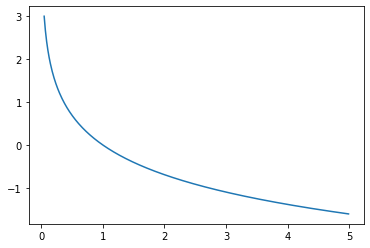

In [ ]:
def negln(x):
  return(-np.log(x))

x=np.arange(.05,5,.01)
plt.plot(x,negln(x))

#####$x^2$ on $[0,\infty)$

Strictly monotonically increasing; again note that this applies only on this domain, as $x^2$ on $\mathbb{R}$ is not monotonically increasing.

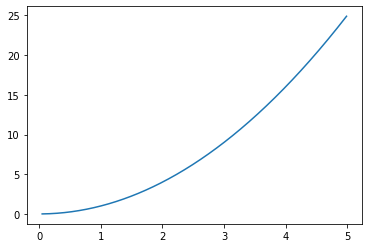

In [ ]:
x=np.arange(.05,5,.01)
plt.plot(x,x**2)

###Bonus round:

Can a function be monotonically increasing, monotonically decreasing, concave, and convex?

Yes, but it's not very interesting... 

$$f(x)=0$$

##Properties of functions

###Gradient vector

For a multivariate, real valued, differentiable function $f(x_1,x_2,...,x_k)$, the gradient is defined as a vector of partial derivatives of each variable.$$\nabla f(x_1,x_2,...,x_k)=\left[\begin{array}{c}\frac{\delta f}{\delta x_1}(x_1,x_2,...,x_k)\\\frac{\delta f}{\delta x_2}(x_1,x_2,...,x_k)\\...\\\frac{\delta f}{\delta x_n}(x_1,x_2,...,x_k)\end{array}\right]$$

This is evaluated at a specific point $(x_1,x_2,...,x_k)$



####Interpretation

The gradient of a function at a specific point produces a vector tangent to the function. Specifically this vector points in the direction of steepest ascent from the current location. We can visualize this for a two-dimensional surface, but we will rely on this fact in higher dimensions as well.

####Example $f(x_1,x_2)=x_1^2-x_2^2$

These partial derivatives are straight foward, giving us the following gradient,

$$\nabla f(x_1,x_2)=\left[\begin{array}{c}\frac{\delta}{\delta x_1}(x_1^2-x_2^2)\\\frac{\delta}{\delta x_2}(x_1^2-x_2^2)\end{array}\right]=\left[\begin{array}{c}2x_1\\-2x_2\end{array}\right]$$


We define two separate functions here for the two parts of the gradient, as the functions in question want them one at a time. First lets look at the surface in question.

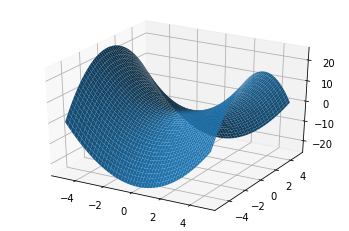

In [ ]:
def f(x1,x2):
  return(x1**2-x2**2)
def df1(x1,x2):
  return(2*x1)
def df2(x1,x2):
  return(-2*x2)

X1 = np.arange(-5, 5, 0.05)
X2 = np.arange(-5, 5, 0.05)
X1, X2 = np.meshgrid(X1, X2)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(X1,X2,f(X1,X2))
plt.show()

def plotTangent(x1,x2):
  fig, ax = plt.subplots()
  cs = ax.contourf(X1, X2, f(X1,X2), cmap="Greys")
  cbar = fig.colorbar(cs)
  if(df1(x1,x2)!=0 or df2(x1,x2)!=0):
    plt.arrow(x1,x2,-df1(x1,x2)/10,-df2(x1,x2)/10,head_width=.25)
  plt.show()

As a note, we are typically interested in the direction of steepest descent, so the code here marks the direction of vector $-\nabla f(x_1,x_2)$ with an arrow.

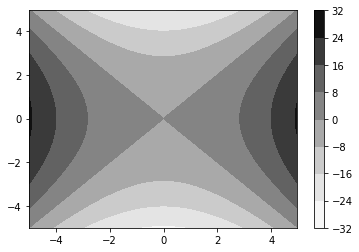

In [ ]:
plotTangent(0,0) # Numbers between -5,5

###Hessian matrix

For a multivariate, real valued, differentiable function $f(x_1,x_2,...,x_k)$, the Hessian matrix is a square matrix consisting of the partial second derivatives for each pair of variables.$$\nabla f(x_1,x_2,...,x_k)=\begin{bmatrix}
  \dfrac{\partial^2 f}{\partial x_1^2} & \dfrac{\partial^2 f}{\partial x_1\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_1\,\partial x_k} \\[2.2ex]
  \dfrac{\partial^2 f}{\partial x_2\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_2^2} & \cdots & \dfrac{\partial^2 f}{\partial x_2\,\partial x_k} \\[2.2ex]
  \vdots & \vdots & \ddots & \vdots \\[2.2ex]
  \dfrac{\partial^2 f}{\partial x_k\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_k\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_k^2}
\end{bmatrix}$$

While the Hessian matrix does not have an easy visual interpretation like a gradient, it does have a number of properties we will note shortly. 

###Critical Points

The critical points of a function correspond to the points in the domain where the gradient vector is 0 or undefined.

#####Example $f(x)=x^3-x^2$

For a single variable function, the gradient vector is reduced to just the first derivative. As such, the derivative of this function is,
$$\frac{\delta f(x)}{\delta x}=3x^2-2x$$
This function has two critical points, when $x=0$ and when $x=2/3$.

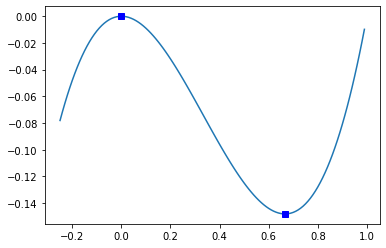

In [ ]:
x=np.arange(-.25,1,.01)
fx=x**3-x**2
plt.plot(x,fx)
crit=np.array([0,2/3])
plt.plot(crit,crit**3-crit**2,'bs')
plt.show()

#####Relating to function types

####Optima

An optima is a point on a function where that function is maximized (or minimized) within the local region. Optima will always coincide with a critical point, but not all critical points are optima.

#####Local vs global optimum

An optimum can either be local or global. A global optimum is the point where the function is maximized (or minimized), whereas a local optimum is only a maximum within a subset of the domain. A function may have multiple global optimums (assuming they all have the same value), and multiple local optimums. Note that a global optima is also a local optima.

In our search for optimal solutions, we will often run into (and accept) local optima, especially in cases where the domain of possible solutions is large.

####Saddle points

A point where the gradient is 0 that is not a global optimum is known as a saddle point, similar to the point in the center of a saddle. Simple gradient descent methods can get snagged on these points, with no direction of greatest ascent.

#####Example

For the function we looked at earlier, $f(x_1,x_2)=x_1^2-x_2^2$, the point $(0,0)$ is a saddle point.

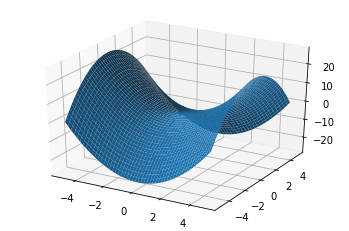

In [ ]:
def f(x1,x2):
  return(x1**2-x2**2)
def df1(x1,x2):
  return(2*x1)
def df2(x1,x2):
  return(-2*x2)

X1 = np.arange(-5, 5, 0.05)
X2 = np.arange(-5, 5, 0.05)
X1, X2 = np.meshgrid(X1, X2)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(X1,X2,f(X1,X2))
ax.scatter(0,0,0)
plt.show()

def plotTangent(x1,x2):
  fig, ax = plt.subplots()
  cs = ax.contourf(X1, X2, f(X1,X2), cmap="Greys")
  cbar = fig.colorbar(cs)
  if(df1(x1,x2)!=0 or df2(x1,x2)!=0):
    plt.arrow(x1,x2,-df1(x1,x2)/10,-df2(x1,x2)/10,head_width=.25)
  plt.show()

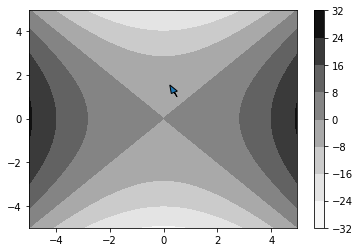

In [ ]:
plotTangent(.5,1)

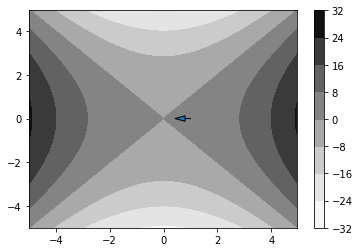

In [ ]:
plotTangent(1,0)

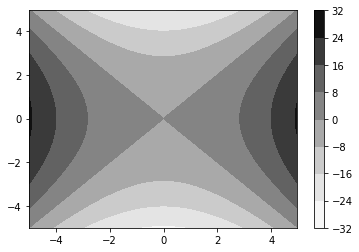

In [ ]:
plotTangent(0,0)

####Hessian Matrix

The Hessian matrix can be used to assess a critical point, and can potentially determine if it is an optimum or saddle point.




#####Positive/Negative and definiteness/semi-definite


A matrix is positive definite if all of its eigenvalues are positive, and positive semi-definite is all of its eigenvalues are non-negative (including 0). Similarly, a matrix is negative definite if all eigenvalues are negative, or negative semi-definite if all eigenvalues are non-positive, including 0.



#####Critical points


If the Hessian at a critical point is positive (negative) definite, that point is a local minimum (maximum). If the Hessian at that point has both negative and positive eigenvalues, that point is a saddle point.

##Linear regression via gradient descent

Let us consider a function $f(x)$ that follows a linear trend, and some $y$ generated from $f(x)$ with some added (Normally distributed) noise. This is exactly the data generating function assumed when performing simple linear regression. 

$$y=ax+b+\epsilon$$ where $\epsilon\sim Normal(0,\sigma^2)$. The goal of linear regression is to recover the true values of $a$ and $b$ and in turn recover $f(x)$. We will use a large amount of data to ensure precision, for demonstrative purposes. 

Correlation = 0.3363601636904621


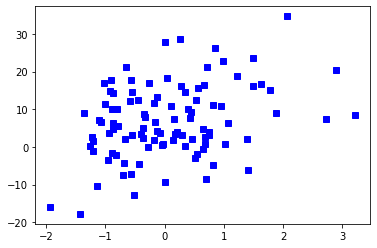

In [ ]:
np.random.seed(416)
x=np.random.randn(100) # X is N(0,1)
y=x*4+5+np.random.randn(100)*10 # Y is 4x+5+epsilon with epsilon N(0,10)
print("Correlation =",np.corrcoef(y,x)[0,1])
plt.plot(x,y,'bs')
plt.show()

###Linear regression as a convex function optimization


The goal of linear regression is to minimize the squared distance between each point $(x,y)$ and our estimate $(x,\hat f(x))$. For each point we wish to find an optimal $a$ and $b$ such that $(y_i-(ax_i+b))^2$ is minimized for each point. More specifically, we wish to find 
$$\min_{\hat a,\hat b}\sum_{i=1}^n(y_i-(ax_i+b))^2.$$

As this is a sum of convex functions, it is also convex. We can see what this loss function looks like below. Note that we can include a normalization constant $1/n$, but this does not influence the location $(a,b)$ of the optimum.

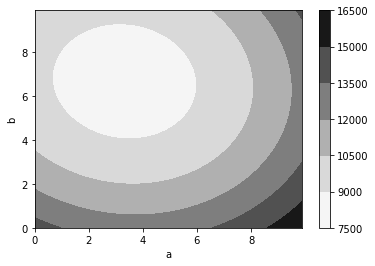

In [ ]:
a = np.arange(0, 10, 0.1)
b = np.arange(0, 10, 0.1)
a,b = np.meshgrid(a, b)
sqerror=np.zeros([100,100])
for i in range(0,100):
  for j in range(0,100):
    sqerror[i,j]=np.sum((y-(a[i,j]*x+b[i,j]))**2)

fig, ax = plt.subplots()
cs = ax.contourf(a, b, sqerror, cmap="Greys")
cbar = fig.colorbar(cs)
plt.xlabel("a")
plt.ylabel("b")
plt.show()

####Gradient

Recall that the gradient is defined as the vector of partial derivatives of the function. For our loss function which we will denote $g(a,b)$, we have
$$\frac{\partial g(a,b)}{\partial a}=\sum_{i=1}^n-2x_i(y_i-(ax_i+b))$$

$$\frac{\partial g(a,b)}{\partial b}=\sum_{i=1}^n-2(y_i-(ax_i+b))$$

In [ ]:
def dga(a0,b0):
  return(np.sum(-2*x*(y-(a0*x+b0))))

def dgb(a0,b0):
  return(np.sum(-2*(y-(a0*x+b0))))

def plotTangent(a0,b0):
  fig, ax = plt.subplots()
  cs = ax.contourf(a,b, sqerror, cmap="Greys")
  cbar = fig.colorbar(cs)
  if(dga(a0,b0)!=0 or dgb(a0,b0)!=0):
    plt.arrow(a0,b0,-dga(a0,b0)/1000,-dgb(a0,b0)/1000,head_width=.25)
  plt.xlabel("a")
  plt.ylabel("b")
  plt.show()

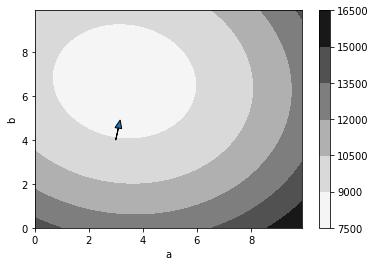

In [ ]:
plotTangent(3,4)

####Gradient descent

Because the problem is convex, we can pick an arbitrary starting point and then trend toward the optimum by taking steps in the direction of greatest descent. We will try this as a class exercise. 

Try to complete the algorithm, and take the following points into consideration:

*   The gradient functions $dga(a,b)$ and $dgb(a,b)$ return magnitude of steepest **ascent** of $g(a,b)$.
* We wish to find the values of $a$ and $b$ which give the lowest value of loss $g(a,b)$.
* Be sure to set a 'step size' when updating $\hat a$ and $\hat b$. (Unsure where to start? Consult the plotting code above to see how big a 'step' the arrow represents)
* We will take 10 steps from the chosen starting point - ignore stopping points for now.
*  Whoever gets closest to the correct answer wins a prize!*

<sup><sub>*prize is a sense of pride and accomplishment.</sub></sup>

###Class Participation

In [ ]:
def plotGradDesc(ahatvec,bhatvec):
  fig, ax = plt.subplots()
  cs = ax.contourf(a,b, sqerror, cmap="Greys")
  cbar = fig.colorbar(cs)
  plt.xlabel("a")
  plt.ylabel("b")

  for i in range(1,11):
    plt.arrow(ahatvec[i-1],bhatvec[i-1],ahatvec[i]-ahatvec[i-1],bhatvec[i]-bhatvec[i-1],head_width=.25)
  plt.show()
  plt.plot(x,y,'bs')
  for i in range(0,11):
    plt.plot([np.min(x),np.max(x)],[bhatvec[i]+np.min(x)*ahatvec[i],bhatvec[i]+np.max(x)*ahatvec[i]],'k',alpha=(i+1)/11.0)
  plt.show()

def finalError(ahatvec,bhatvec):
  ahat=np.std(y)/np.std(x)*np.corrcoef(y,x)[0,1]
  bhat=np.mean(y)-ahat*np.mean(x)
  print("Final distance from optimum: ",np.sqrt((ahat-ahatvec[10])**2+(bhat-bhatvec[10])**2))

Content removed

###Instructor solutions

And for all you folk who thought you'd be cheeky and pick a really good starting point...

Correlation = -0.23227804391036483


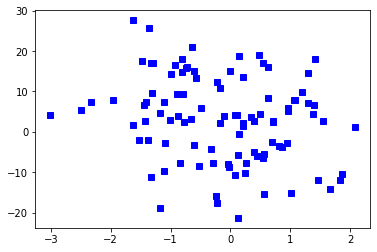

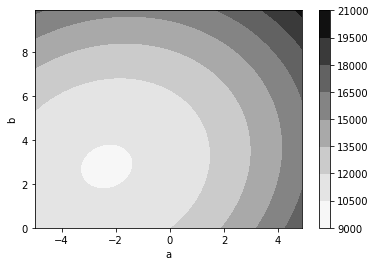

In [ ]:
np.random.seed(417)
x=np.random.randn(100) # X is N(0,1)
y=x*-3+2+np.random.randn(100)*10 # Y is -3x+2+epsilon with epsilon N(0,10)
print("Correlation =",np.corrcoef(y,x)[0,1])
plt.plot(x,y,'bs')
plt.show()

a = np.arange(-5, 5, 0.1)
b = np.arange(0, 10, 0.1)
a,b = np.meshgrid(a, b)
sqerror=np.zeros([100,100])
for i in range(0,100):
  for j in range(0,100):
    sqerror[i,j]=np.sum((y-(a[i,j]*x+b[i,j]))**2)

fig, ax = plt.subplots()
cs = ax.contourf(a, b, sqerror, cmap="Greys")
cbar = fig.colorbar(cs)
plt.xlabel("a")
plt.ylabel("b")
plt.show()

Gradient vector at your starting point is: ( 2173.8996429300164 , 562.6965561643804 )


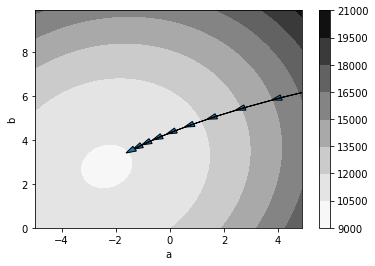

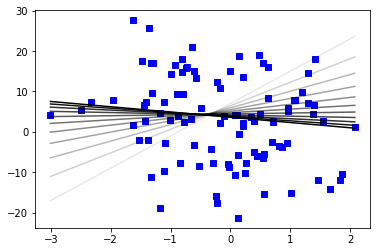

In [ ]:
# Please name all your variables with your group number at the end
ahat0=np.zeros(11)
bhat0=np.zeros(11)

ahat0[0]=8
bhat0[0]=7

print("Gradient vector at your starting point is: (",dga(ahat0[0],bhat0[0]),",",dgb(ahat0[0],bhat0[0]),")")

for i in range(1,11):
  #Take any necessary steps to find the next point
  # and save it in your ahat/bhat vectors

  astep0=0.001*dga(ahat0[i-1],bhat0[i-1]) 
  bstep0=0.001*dgb(ahat0[i-1],bhat0[i-1])
  ahat0[i]=ahat0[i-1]-astep0 #Remember to step away from steepest ascent
  bhat0[i]=bhat0[i-1]-bstep0

plotGradDesc(ahat0,bhat0)

####Coordinate descent

A somewhat simpler approach, coordinate descent is similar to gradient descent in that it takes steps in the direction of greatest descent to optimize the covariates, only rather than update both covariates simultaneously, we instead update them one at a time. This can be useful when the update step of one covariate depends on the others.

Gradient vector at your starting point is: ( 1342.453190975899 , 270.6971078224862 )


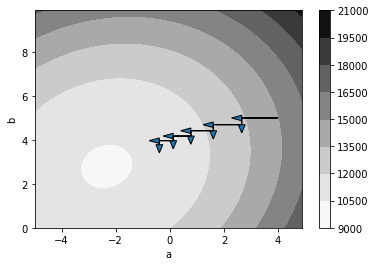

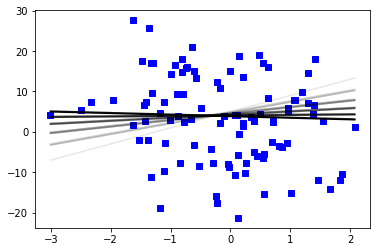

In [ ]:
# Please name all your variables with your group number at the end
ahat00=np.zeros(11)
bhat00=np.zeros(11)

ahat00[0]=4
bhat00[0]=5

print("Gradient vector at your starting point is: (",dga(ahat00[0],bhat00[0]),",",dgb(ahat00[0],bhat00[0]),")")

for i in range(1,11):
  #Take any necessary steps to find the next point
  # and save it in your ahat/bhat vectors
  if(i%2!=0):
    astep00=0.001*dga(ahat00[i-1],bhat00[i-1]) 
    ahat00[i]=ahat00[i-1]-astep00 #Remember to step away from steepest ascent
    bhat00[i]=bhat00[i-1]
  else:
    bstep00=0.001*dgb(ahat00[i-1],bhat00[i-1])
    bhat00[i]=bhat00[i-1]-bstep00
    ahat00[i]=ahat00[i-1]

plotGradDesc(ahat00,bhat00)

####True optimal solution

Because linear regression is a simple, easily differentiable function, a simple solution exists for the optimum. This will not be the case for the majority of projects in this class. Though machine learning techniques can be applied to simple problems like linear regression, they are generally best saved for problems without solutions.

#####Necessary statistics

The optimal linear regression equation requires five statistics to calculate, the correlation coefficient, and the mean and standard deviations of $x$ and $y$. These can be calculated from the data as
$$\bar{x}=\frac{1}{n}\sum_{i=0}^n x_i \;\;\; \bar{y}=\frac{1}{n}\sum_{i=0}^n y_i\\
S_x=\sqrt{\frac{1}{n-1}\sum_{i=0}^n (x_i-\bar{x})^2}\\
S_y=\sqrt{\frac{1}{n-1}\sum_{i=0}^n (y_i-\bar{y})^2}\\
r=\frac{\frac{1}{n-1}\sum_{i=0}^n (y_i-\bar{y})(x_i-\bar{x})}{S_yS_x}$$

Statisticians refer to these as *sufficient statistics*, as they contain all relevant information about the associated statistical parameters ($\mu_x, \mu_y, \sigma^2_x,\sigma^2_y,\rho$) that is available in the data.

#####Optimum solution

From these statistics we can calculate an optimal value of $\hat{a}$ and $\hat{b}$,
$$\hat{a}=\frac{S_x}{S_y}r$$
$$\hat{b}=\bar{y}-\hat{a}\bar{x}$$

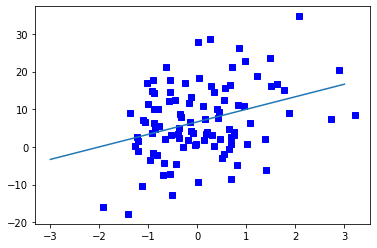

Optimum:( 3.326286713838668 , 6.669364385920103 )


In [ ]:
r=np.corrcoef(y,x)[0,1]
Sx=np.std(x)
Sy=np.std(y)
xbar=np.mean(x)
ybar=np.mean(y)

ahat=Sy/Sx*r
bhat=ybar-ahat*xbar

plt.show()
plt.plot(x,y,'bs')
plt.plot([-3,3],[bhat-3*ahat,bhat+3*ahat])
plt.show()

print("Optimum:(",ahat,",",bhat,")")

And sure enough, if we check the gradient, we see that both indicies are equal to (effectively) 0.

In [ ]:
print(dga(ahat,bhat))
print(dgb(ahat,bhat))

-4.369837824924616e-13
1.1191048088221578e-13
